<a href="https://colab.research.google.com/github/lekshanapriya2003/Clustering-with-K-Means/blob/main/Clustering_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering with K-Means**

## Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('Mall_Customers.csv')

## Dataset Rows & Columns count

In [4]:
# Dataset First Look
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Dataset Rows & Columns count
df.shape

(200, 5)

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
# total null values presnt in the data
df.isnull().sum().sum()


np.int64(0)

In [19]:
df = df.dropna()

In [20]:
df = df.fillna(df.mean(numeric_only=True))  # Replace NaN with column means


## Understanding Variables

In [21]:
# Dataset Columns
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [11]:
# Dataset Describe
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
# description of all the features.
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [13]:
# handling null values.
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [33]:
print(df.head())          # Check original dataframe
print(df.columns)         # Check columns in dataframe
print(df.shape)           # Check number of rows and columns

# Now define X:
X = df.copy()
print(X.shape)            # Confirm X shape same as df

# If you want to encode Gender:
if 'Gender' in X.columns:
    print(X['Gender'].unique())   # Check unique values in Gender
    X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

print(X.head())
print(X.shape)

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
(0, 4)
(0, 4)
[]
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
(0, 4)


In [35]:
import pandas as pd

# Re-read the dataset
df = pd.read_csv('Mall_Customers.csv')  # replace with correct file path or uploaded file

# Drop CustomerID
df.drop('CustomerID', axis=1, inplace=True)

# Encode 'Gender'
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define features
X = df.copy()

# Confirm shape and values
print(X.shape)
print(X.head())


(200, 4)
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Find Optimal K (Elbow Method)

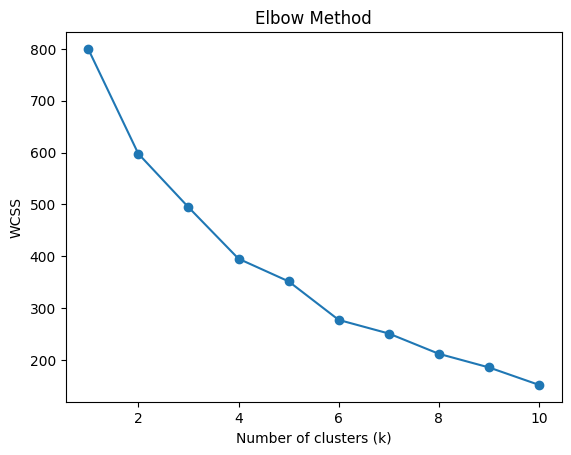

In [37]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## Fit KMeans with Optimal K

In [38]:
k = 5  # Example from elbow result
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans

## Visualize Clusters (Optional PCA to 2D)

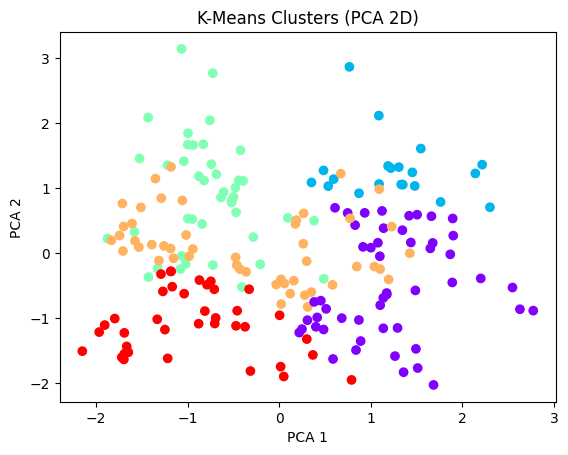

In [39]:
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='rainbow')
plt.title('K-Means Clusters (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Evaluate Clustering

In [40]:
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.27
